# Single NFW profile

Here we demonstrate most of the NFW functionality using a single NFW profile.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from profiley.nfw import NFW

In [2]:
mass = 1e14
concentration = 4
redshift = 0.5

In [3]:
nfw = NFW(mass, concentration, redshift)
print(nfw)

NFW density profile
  mass = [1.e+14]
  c    = [4.]
  z    = [0.5]


Note that the profile attributes are always arrays, even if scalars are passed to it.

The first thing to look at is the 3-dimensional density profile. For all profiles we need to pass the distances at which these will be computed, as a 1d array, so let's define that first.
These distances must be in Mpc.

In [4]:
R = np.logspace(-2, 1, 100)

With that, getting the density profile is as simple as

In [5]:
rho = nfw.profile(R)

That's it!

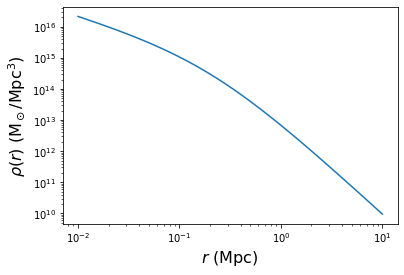

In [6]:
plt.loglog(R, rho)
plt.xlabel('$r$ (Mpc)', fontsize=16)
plt.ylabel(r'$\rho(r)$ (M$_\odot$/Mpc$^3$)', fontsize=16);

Similarly, we can obtain the projected surface density or the excess surface density (the weak lensing observable):

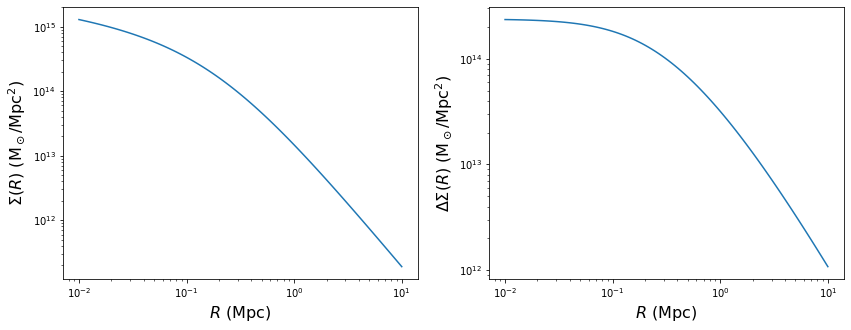

In [7]:
sigma = nfw.surface_density(R)
esd = nfw.excess_surface_density(R)

fig, axes = plt.subplots(figsize=(14,5), ncols=2)
axes[0].plot(R, sigma)
axes[0].set_ylabel(r'$\Sigma(R)$ (M$_\odot$/Mpc$^2$)', fontsize=16)
axes[1].plot(R, esd)
axes[1].set_ylabel(r'$\Delta\Sigma(R)$ (M$_\odot$/Mpc$^2$)', fontsize=16)
for ax in axes:
    ax.set_xlabel('$R$ (Mpc)', fontsize=16)
    ax.set_xscale('log')
    ax.set_yscale('log')

The ESD can also be calculated "manually":

In [8]:
barsigma = nfw.enclosed_surface_density(R)
esd_manual = barsigma - sigma
np.allclose(esd, esd_manual)

True

We can also calculate the convergence profile for a given source redshift:

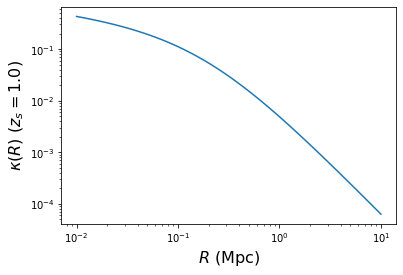

In [9]:
z_source = 1.0
kappa = nfw.convergence(R, z_source)

plt.loglog(R, kappa)
plt.xlabel('$R$ (Mpc)', fontsize=16)
plt.ylabel(f'$\kappa(R)$ ($z_s={z_source}$)', fontsize=16);

Finally, we can also obtain offset profiles like so:

In [10]:
Roff = np.linspace(0.2, 1, 5)
sigma_off = nfw.offset_surface_density(R, Roff)
sigma_off.shape

(5, 1, 100)

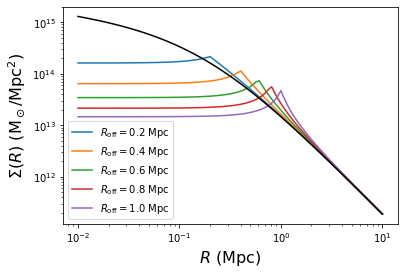

In [11]:
for Ri, sigma_i in zip(Roff, sigma_off):
    plt.loglog(R, sigma_i[0], label=rf'$R_\mathrm{{off}}={Ri:.1f}$ Mpc')
plt.plot(R, sigma, 'k-')
plt.legend()
plt.xlabel('$R$ (Mpc)', fontsize=16)
plt.ylabel(r'$\Sigma(R)$ (M$_\odot$/Mpc$^2$)', fontsize=16);

There is a similar `offset_excess_surface_density` method, as well as `offset_density` and `ofset_enclosed_density`, though these would not be used so often. The offset convergence has a different signature:

In [12]:
kappa_off = nfw.convergence(R, z_source, Roff=Roff)

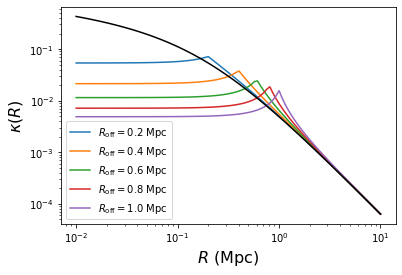

In [13]:
for Ri, kappa_i in zip(Roff, kappa_off):
    plt.loglog(R, kappa_i[0], label=rf'$R_\mathrm{{off}}={Ri:.1f}$ Mpc')
plt.plot(R, kappa, 'k-')
plt.legend()
plt.xlabel('$R$ (Mpc)', fontsize=16)
plt.ylabel(r'$\kappa(R)$', fontsize=16);